# Objective:
Developed a predictive model to identify patients at risk of developing Chronic Kidney Disease (CKD) using electronic health records. Early detection can lead to timely interventions and better management of patients at risk.


## ATTRIBUTES USED IN DATASET

Id: Identifier   
age: Age   
bp: Blood Pressure     
sg: Specific Gravity      
al: Albumin      
su: Sugar      
rbc: Red Blood Cells   
pc: Pus Cell   
pcc: Pus Cell Clumps   
ba: Bacteria   
bgr: Blood Glucose Random   
bu: Blood Urea   
sc: Serum Creatinine   
sod: Sodium   
pot: Potassium   
hemo: Hemoglobin   
pcv: Packed Cell Volume   
wc: White Blood Cell Count   
rc: Red Blood Cell Count   
htn: Hypertension   
dm: Diabetes Mellitus   
cad: Coronary Artery Disease   
appet: Appetite   
pe: Pedal Edema   
ane: Anemia   

pip install plotly


In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'Arial'

## IMPORTING THE REQUIRED LIBRARIES

In [3]:
#import libraries
import glob
from keras.models import Sequential,load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import matplotlib.pyplot as plt
import keras as k
import seaborn as sns 


# PROGRAM THAT HELPS DETECTING THE RISK OF CHRONIC KIDNEY DISEASE

### Loading the downloaded csv file 

In [4]:
#importing the downloaded data csv file
data=pd.read_csv('~/Downloads/kidney_disease.csv')
data
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [5]:
data.shape

(400, 26)

## DATA CLEANING AND DATA TRASFORMATION

In [6]:
 #finding the null values in every column
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [7]:
#imputing mode in place of nan values by using simpleimputer 

from sklearn.impute import SimpleImputer
impute_mode=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data_imputed=pd.DataFrame(impute_mode.fit_transform(data))
data_imputed.columns=data.columns
data_imputed

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [8]:
data_imputed.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [9]:
#printing all the numerical values in each and every column so that we can find the outliers
for i in data_imputed.columns:
    print("*"*50,i,"*"*50)
    print()
    print(set(data_imputed[i].tolist()))
    print()

************************************************** id **************************************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200

In [10]:
#finding the mode for rc,wc,pcv
print(data_imputed['rc'].mode())
print(data_imputed['wc'].mode())
print(data_imputed['pcv'].mode())

0    5.2
Name: rc, dtype: object
0    9800
Name: wc, dtype: object
0    41
Name: pcv, dtype: object


In [11]:
#removing outliers by using a lambda function in the data

data_imputed['classification']=data_imputed['classification'].apply(lambda x:'ckd' if x=="ckd\t" else x)

data_imputed['cad']=data_imputed['cad'].apply(lambda x:'no' if x=="\tno" else x)

data_imputed['dm']=data_imputed['dm'].apply(lambda x:'no' if x=="\tno" else x)
data_imputed['dm']=data_imputed['dm'].apply(lambda x:'yes' if x=="\tyes" else x)
data_imputed['dm']=data_imputed['dm'].apply(lambda x:'yes' if x==" yes" else x)

data_imputed['rc']=data_imputed['rc'].apply(lambda x:'5.2' if x=="\t?" else x)

data_imputed['wc']=data_imputed['wc'].apply(lambda x:'9800' if x=="\t6200" else x)
data_imputed['wc']=data_imputed['wc'].apply(lambda x:'9800' if x=="\t8400" else x)
data_imputed['wc']=data_imputed['wc'].apply(lambda x:'9800' if x=="\t?" else x)

data_imputed['pcv']=data_imputed['pcv'].apply(lambda x:'41' if x=="\t43" else x)
data_imputed['pcv']=data_imputed['pcv'].apply(lambda x:'41' if x=="\t?" else x)



## DATA VISUALISATION

### Plotting the classification column

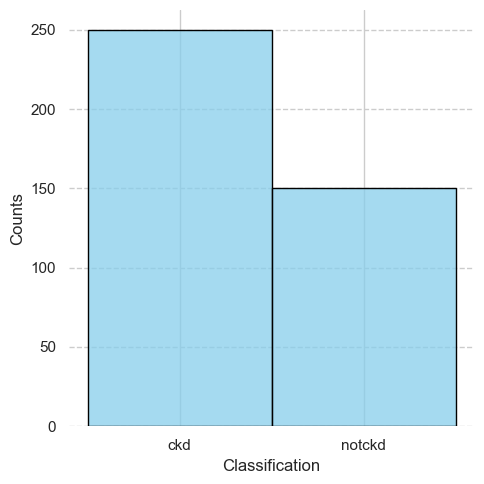

In [12]:
sns.set({'figure.figsize': (4, 4)})
sns.set_theme(style="whitegrid")

# Customizing the color palette and other style elements
custom_palette = sns.color_palette("viridis")
sns.set_palette(custom_palette)

# Plotting  with additional style adjustments
plot = sns.displot(data_imputed['classification'], bins=30, kde=False, color='skyblue', edgecolor='black')

# Adding  title and labels
plot.set( xlabel='Classification', ylabel='Counts')

# Customize grid and ticks
sns.despine(left=True, bottom=True)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()


In [13]:
#printing all the data types before the transformation
data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [14]:
#printing all the data types after transformation
data_imputed.dtypes

id                object
age               object
bp                object
sg                object
al                object
su                object
rbc               object
pc                object
pcc               object
ba                object
bgr               object
bu                object
sc                object
sod               object
pot               object
hemo              object
pcv               object
wc                object
rc                object
htn               object
dm                object
cad               object
appet             object
pe                object
ane               object
classification    object
dtype: object

In [15]:
#converting all the object data types to its original data types
for i in data.select_dtypes(exclude=['object']).columns:
    data_imputed[i]=data_imputed[i].apply(lambda x:float(x))
data_imputed.dtypes
    

id                float64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

### Plotting the pair plots for each and every attribute

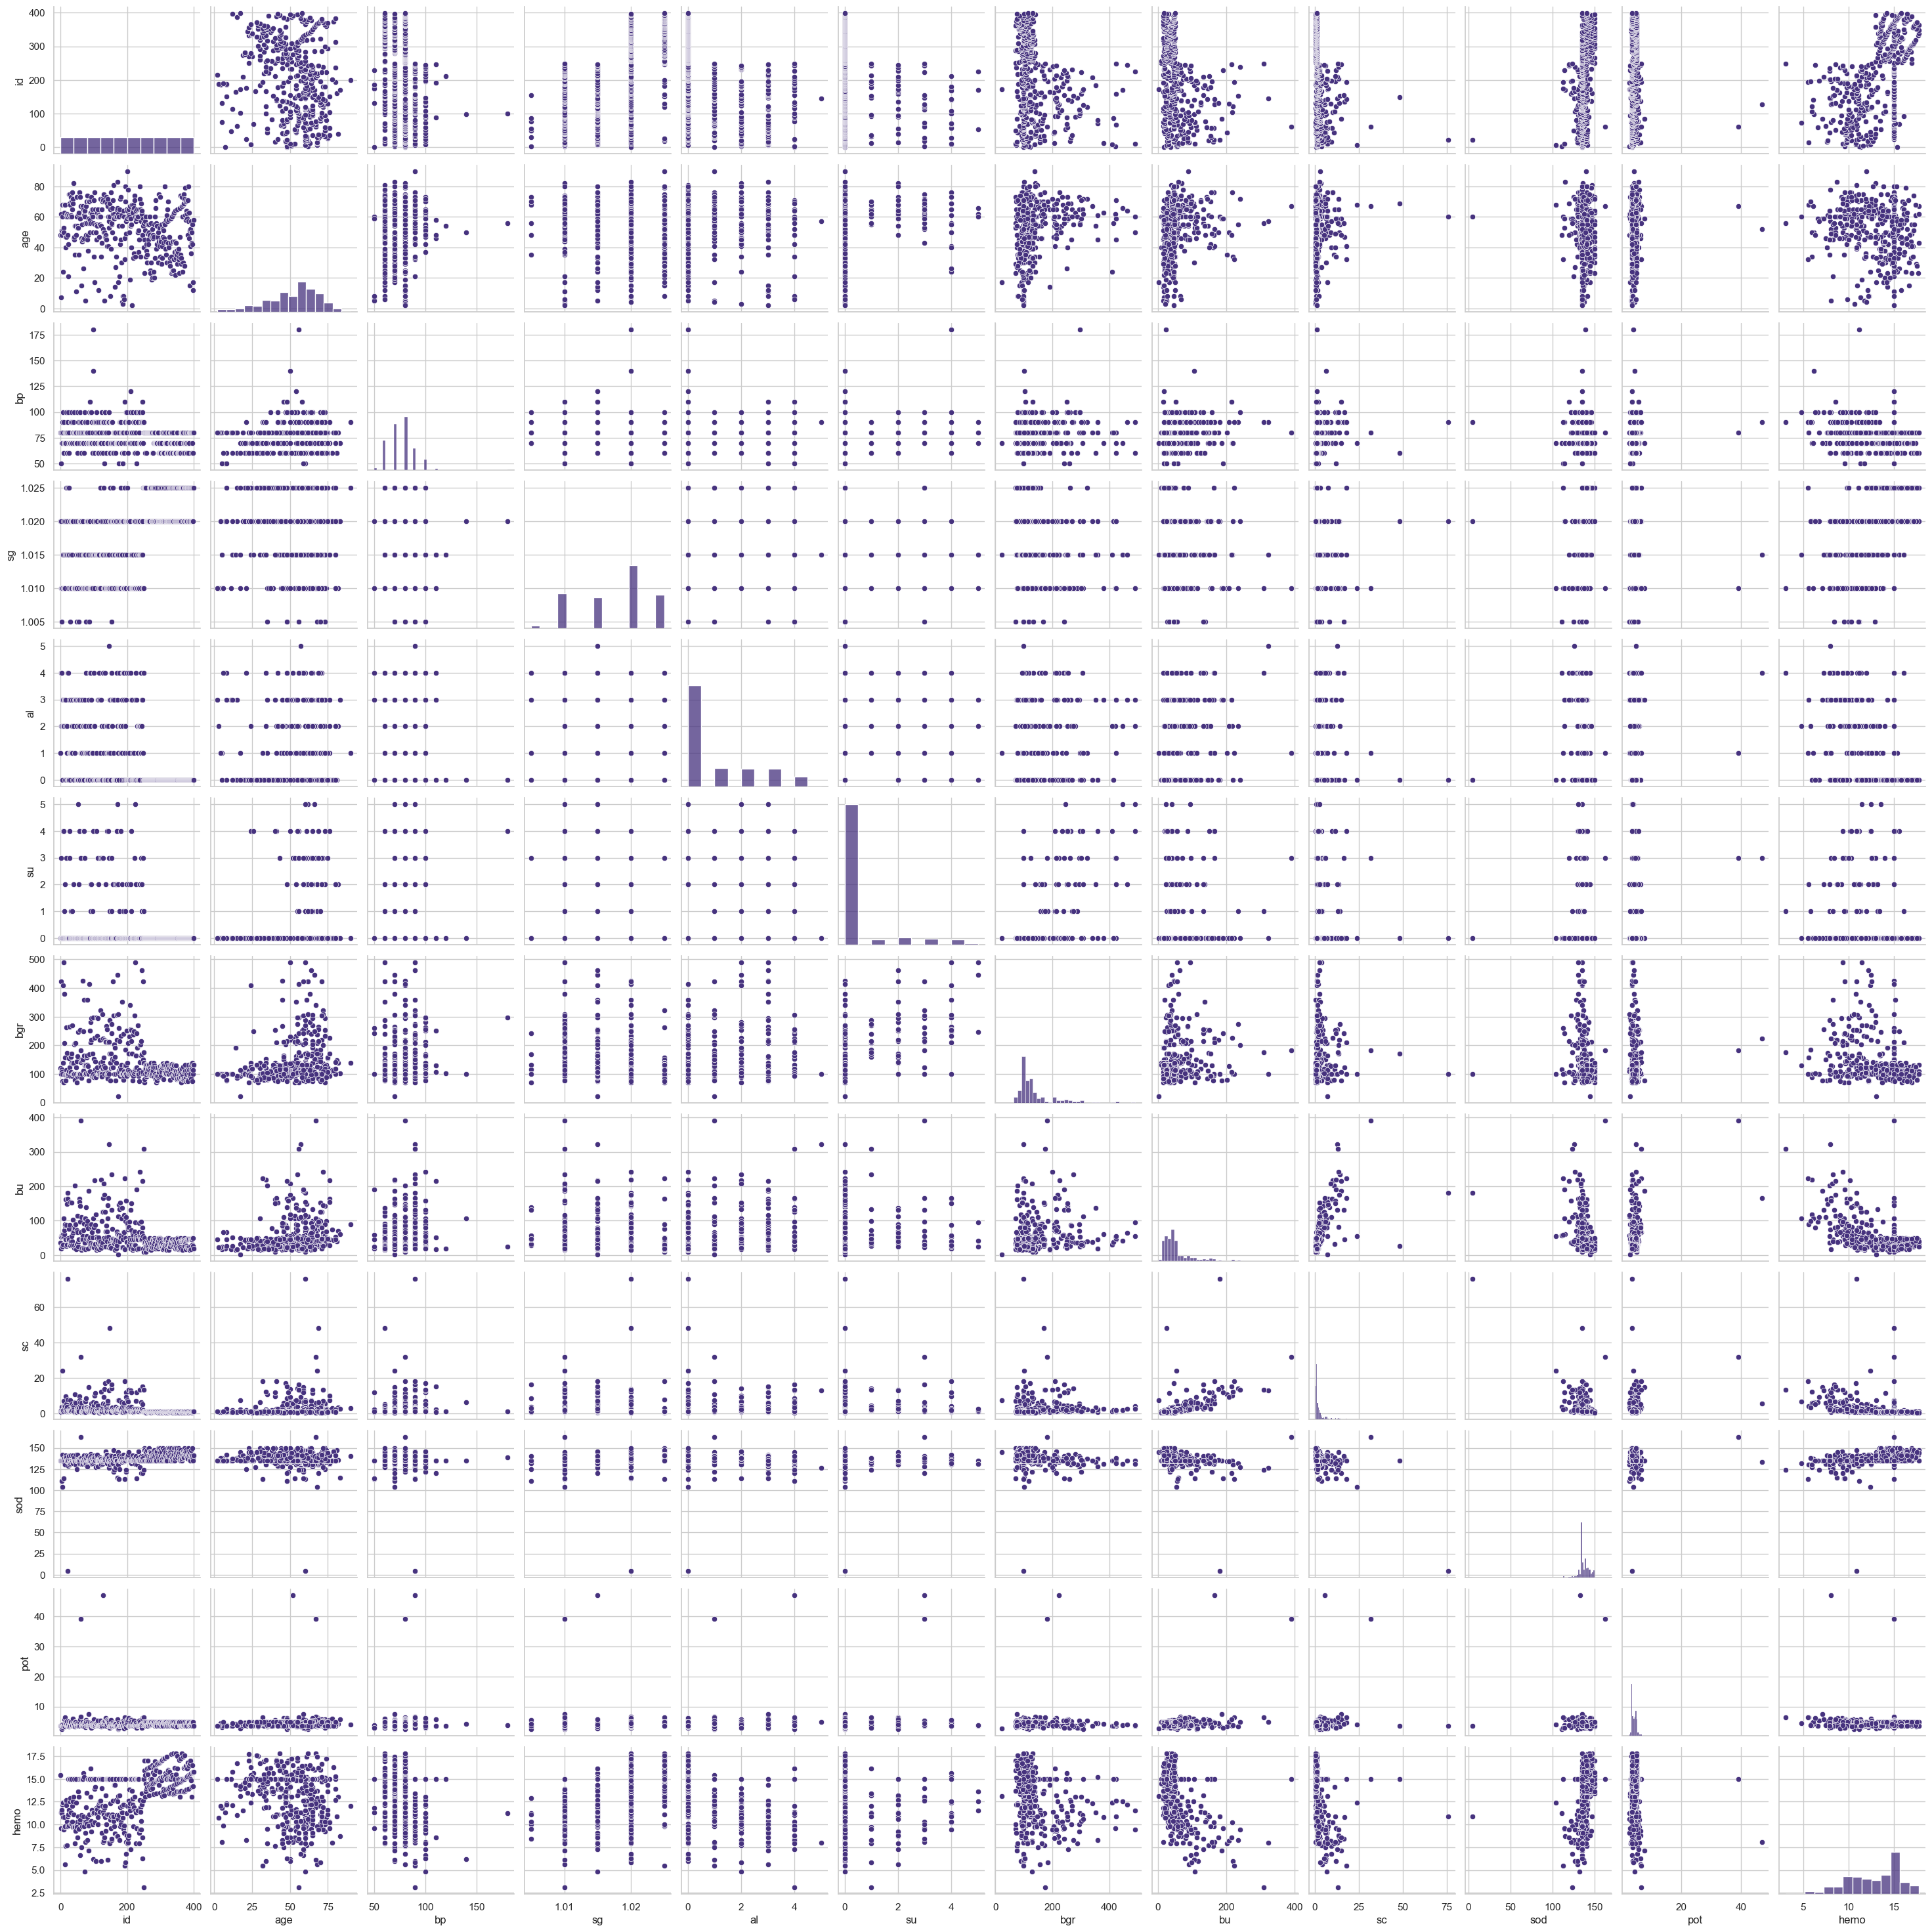

In [16]:
sns.pairplot(data_imputed)

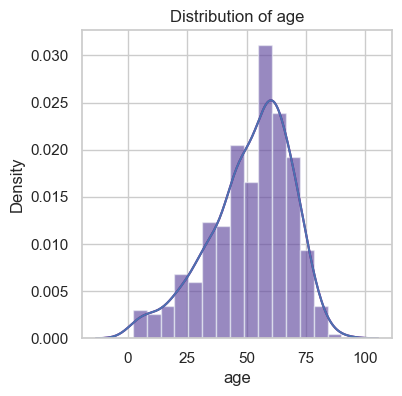

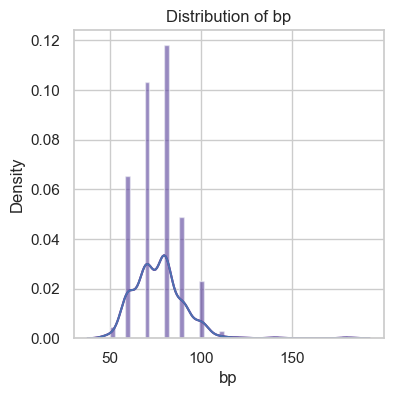

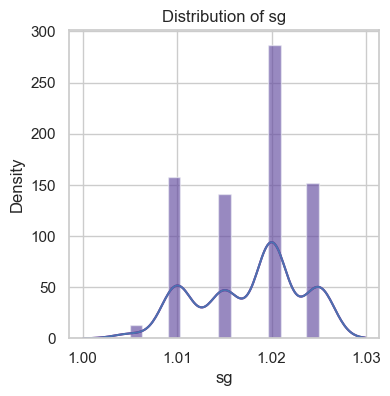

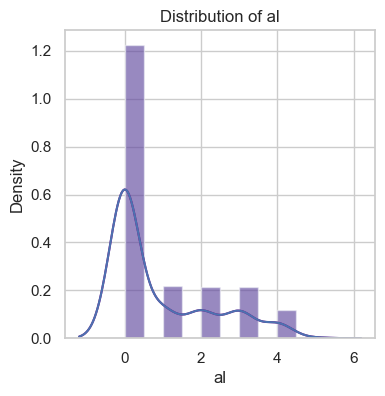

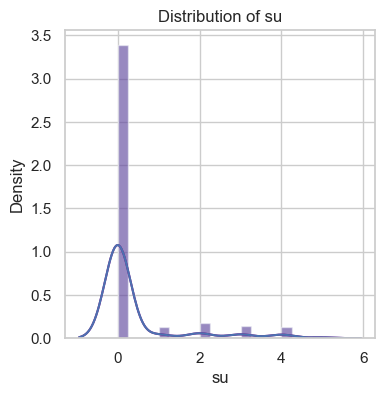

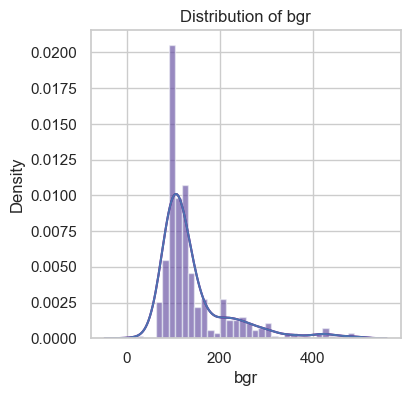

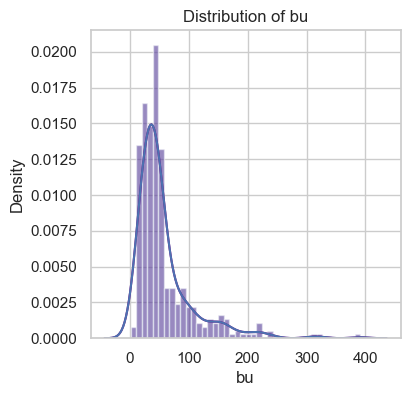

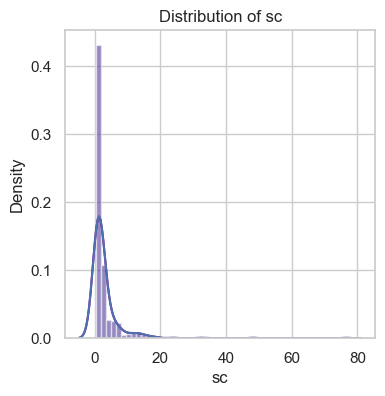

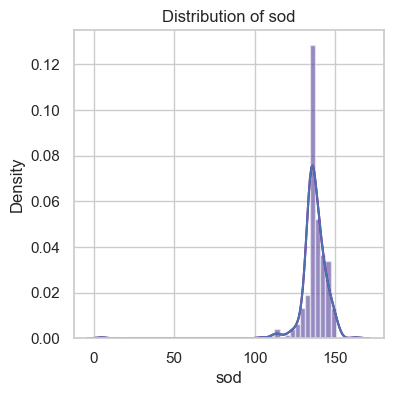

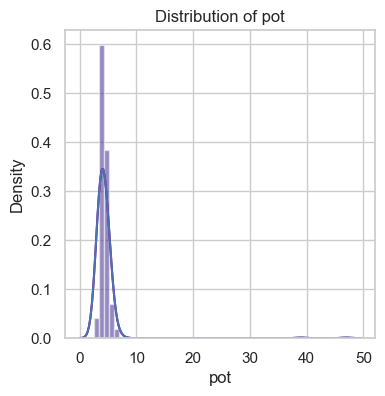

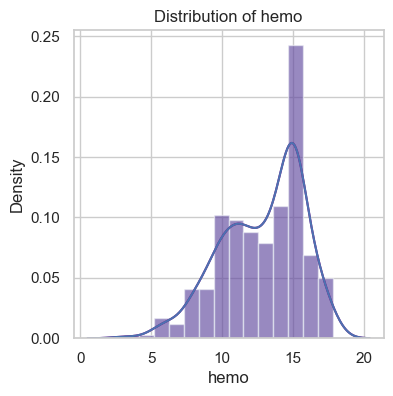

In [17]:
#plotting the bar graph of each and every attribute against the density 
sns.set({'figure.figsize': (4, 4)}) 
for col in list(data_imputed.select_dtypes(exclude=['object']).columns)[1:]:#excuding the object datatype
    sns.set_theme(style="whitegrid")
    sns.distplot(data_imputed[col], color='purple')
    sns.distplot(data_imputed[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()


In [18]:
#converting categorical and non numeric values to numeric values using label encoding

from sklearn import preprocessing
data_encoded=data_imputed.apply(preprocessing.LabelEncoder().fit_transform)
data_encoded

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,40,3,3,1,0,1,1,0,0,...,30,69,33,1,1,0,0,0,0,0
1,1,5,0,3,4,0,1,1,0,0,...,24,53,33,0,0,0,0,0,0,0
2,2,54,3,1,2,3,1,1,0,0,...,17,67,33,0,1,0,1,0,1,0
3,3,40,2,0,4,0,1,0,1,0,...,18,59,18,1,0,0,1,1,1,0
4,4,43,3,1,2,0,1,1,0,0,...,21,65,26,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,47,3,3,0,0,1,1,0,0,...,33,59,29,0,0,0,0,0,0,1
396,396,34,2,4,0,0,1,1,0,0,...,40,69,43,0,0,0,0,0,0,1
397,397,8,3,3,0,0,1,1,0,0,...,35,58,35,0,0,0,0,0,0,1
398,398,11,1,4,0,0,1,1,0,0,...,37,64,40,0,0,0,0,0,0,1


### The revised data set is saved 

In [19]:
data_encoded.to_csv("kidney_disease_processed_data.csv")

## Plotting the Correlation matrix / Heatmap of the obtained Data for feature variables and the target variable

<Axes: >

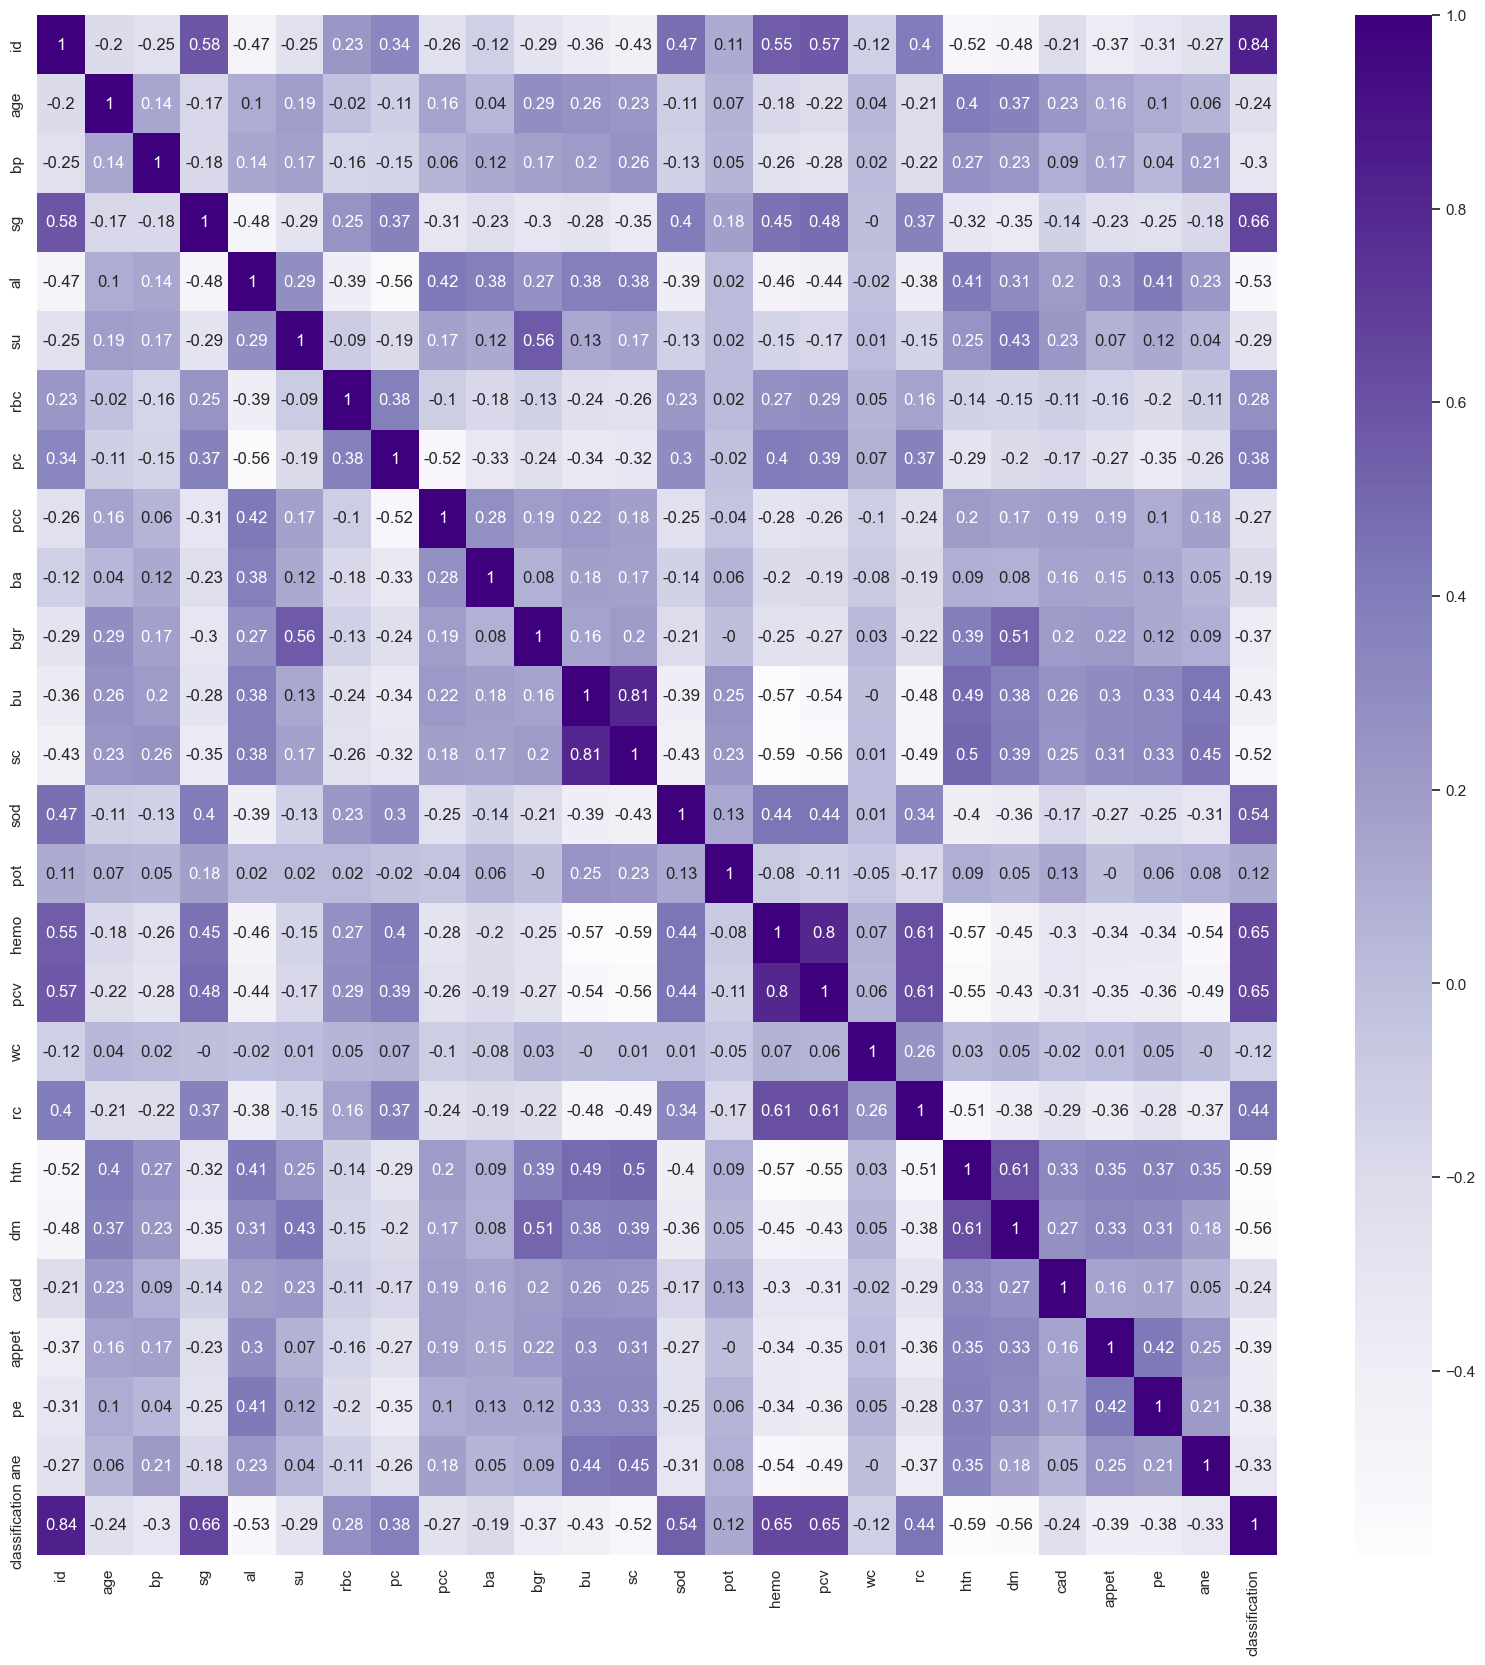

In [20]:

fig, ax = plt.subplots(figsize=(20,20))

correlation_matrix = data_encoded.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True,ax=ax,cmap='Purples')

In [21]:
#split the data into independent (X)data set(the features) and dependent (y)data set(the target)
X=data_encoded.drop(['id','classification'],axis=1)
y=data_encoded['classification']

In [22]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# y is the target variable 
label_distribution = Counter(y)

# printing the label distribution
print("Label Distribution:")
print(label_distribution)



Label Distribution:
Counter({0: 250, 1: 150})


## FEATURE SCALING

In [23]:

#MinMaxScaler method scales the dataset so that all the input features lies between 0 and 1
x_scaler = MinMaxScaler((-1,1))
x_scaler.fit(X)
column_names = X.columns
X[column_names]=x_scaler.transform(X)

In [24]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.decomposition import PCA

# tranforming high dimensional data into a new coordinate system using PCA[Principle Component Analysis]
pca =PCA(.95)
X_PCA=pca.fit_transform(X)
print(X_PCA.shape)


(400, 18)


In [25]:
# printing  the remaining indices and column names after performing PCA
remaining_feature_indices = np.where(pca.components_)[1]
remaining_column_names = X.columns[remaining_feature_indices]
print(remaining_column_names)

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       ...
       'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'],
      dtype='object', length=432)


## Training and Testing the obtained Data

In [26]:
#split the data into 80% training and 20% testing and shuffle
X_train,X_test,y_train,y_test=train_test_split(X_PCA,y,test_size=0.2, shuffle=True,random_state=7)


In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 18)
(80, 18)
(320,)
(80,)


# Building a Model using LOGISTIC REGRESSION

In [28]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing and training the logistic regression model
model = LogisticRegression(random_state=7)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#Printing the accuracy ,confusion matrix and classification report
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.975
Confusion Matrix:
[[48  2]
 [ 0 30]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.94      1.00      0.97        30

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



#### For class 0:
Precision is 1.00 (or 100%), meaning all positive predictions for class 0 are correct.   
Recall is 0.96 (or 96%), indicating that the model correctly captures 96% of the instances of class 0.   
F1-score is 0.98, providing a balanced measure of precision and recall.   
Support is 50, indicating that there are 50 instances of class 0 in the dataset.   
#### For class 1:
Precision is 0.94 (or 94%), indicating that 94% of the positive predictions for class 1 are correct.   
Recall is 1.00 (or 100%), meaning the model correctly captures all instances of class 1.   
F1-score is 0.97, providing a balanced measure of precision and recall.   
Support is 30, indicating that there are 30 instances of class 1 in the dataset.   

In [29]:
#printing the accuracy of the code
accuracy_score(y_pred,y_test)


0.975

## Plotting the ROC Curve

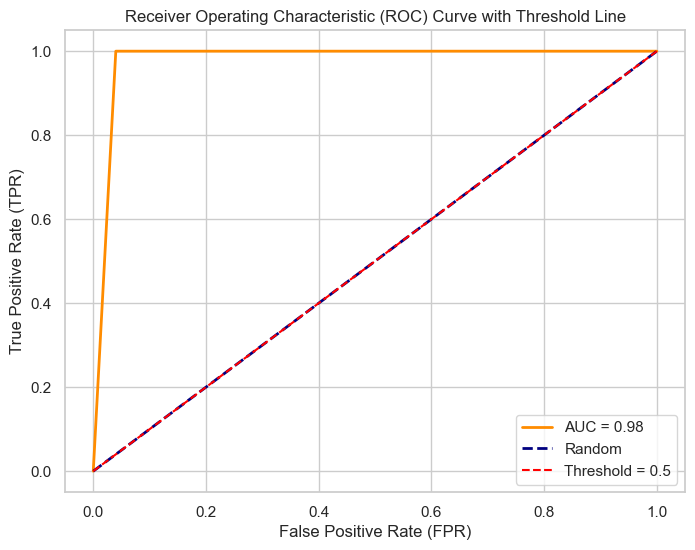

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculating the Area Under the Curve (AUC)
auc_score = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')

# Adding the threshold line
threshold_value = 0.5 
plt.plot([0, fpr[thresholds <= threshold_value][-1], 1],
         [0, tpr[thresholds <= threshold_value][-1], 1],
         color='red', linestyle='--', label=f'Threshold = {threshold_value}')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve with Threshold Line')
plt.legend()
plt.show()


## Plotting Precision-Recall Curve

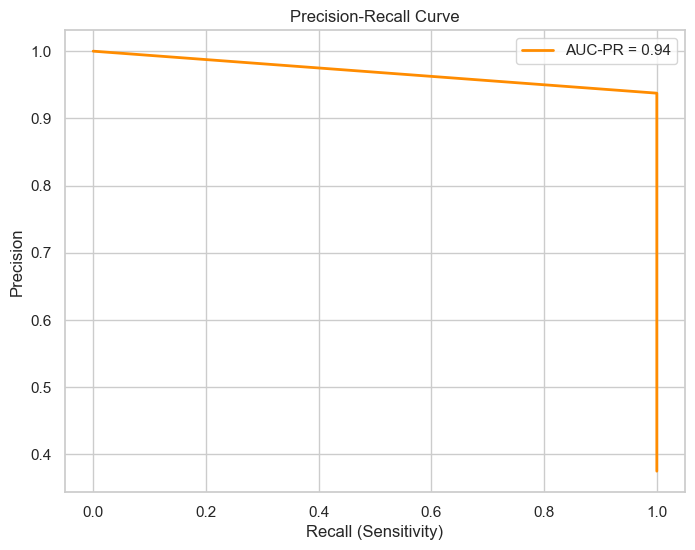

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Calculating the Area Under the Precision-Recall curve (AUC-PR)
average_precision = average_precision_score(y_test, y_pred)

# Plotting the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'AUC-PR = {average_precision:.2f}')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


### Precision:
Precision is the ratio of true positive predictions to the total predicted positives. It measures the accuracy of the positive predictions made by the model.   
Precision = TP / (TP + FP)   
For class 0: Precision = 1.00 (or 100%)   
For class 1: Precision = 0.94 (or 94%)      
### Recall (Sensitivity or True Positive Rate):
Recall is the ratio of true positive predictions to the total actual positives. It measures the model's ability to capture all the positive instances.   
Recall = TP / (TP + FN)   
For class 0: Recall = 0.96 (or 96%)   
For class 1: Recall = 1.00 (or 100%)   

## Printing the Cross-validation scores

In [32]:
from sklearn.model_selection import cross_val_score
#printing the cross validation scores using cross_val_score

cross_val_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Scores: {cross_val_scores}")


Cross-Validation Scores: [1.     0.9875 0.9875 0.9625 0.9875]


The output [1.0, 0.9875, 0.9875, 0.9625, 0.9875] represents the cross-validation scores obtained for each fold in a 5-fold cross-validation. Each score indicates the performance of the model on a different subset of the data. Let's break down the interpretation:   

#### Fold 1: Score = 1.0   
The model achieved perfect accuracy on the first fold, meaning it made correct predictions for all instances in the first subset of the data used for testing.   
#### Fold 2: Score = 0.9875   
The model achieved an accuracy of 98.75% on the second fold, indicating that it made correct predictions for 98.75% of the instances in the second subset of the data used for testing.   
#### Fold 3: Score = 0.9875   
Similarly, the model achieved an accuracy of 98.75% on the third fold.
#### Fold 4: Score = 0.9625   
The accuracy dropped slightly to 96.25% on the fourth fold, meaning the model made correct predictions for 96.25% of the instances in the fourth subset of the data used for testing.   
#### Fold 5: Score = 0.9875   
The model achieved an accuracy of 98.75% on the fifth fold.   

## Printing The Absolute Error and The Mean Squared Error

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
#printing the absolute error and the mean square error

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")


Mean Absolute Error: 0.0625
Mean Squared Error: 0.0625


## Loading the model into a pickel file

In [34]:
import pickle
from sklearn.linear_model import LogisticRegression  # Replace with your model

model = LogisticRegression()
model.fit(X_train, y_train)  

model_path = 'model.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(model, file)


## Predicting the final result for an unknown data values

In [35]:
new_data = np.array([60, 70, 1.02, 1, 100, 40, 1.2, 3.2, 15, 44, 1000, 3.9, 0, 0, 0, 0, 0, 0])
new_data_reshaped = new_data.reshape(1, -1)

# Scaling the reshaped data
new_data_scaled = scaler.transform(new_data_reshaped)

prediction = model.predict(new_data_scaled)

# printing the result
if prediction == 1:
    print("The person is predicted to have CKD.")
else:
    print("The person is predicted not to have CKD.")


The person is predicted to have CKD.


In [36]:
new_data = np.array([60, 70, 1.02, 1, 500, 40, 1.2, 3.2, 15, 44, 1000, 3.9, 0, 0, 1, 1, 1, 0])
new_data_reshaped = new_data.reshape(1, -1)

# Scaling the reshaped data
new_data_scaled = scaler.transform(new_data_reshaped)


prediction = model.predict(new_data_scaled)

# printing the result
if prediction == 1:
    print("The person is predicted to have CKD.")
else:
    print("The person is predicted not to have CKD.")


The person is predicted not to have CKD.
